# Data Loading

In [1]:
import pandas as pd

# Load the data
data = pd.read_excel("/mnt/data/doppio_binario_2023_05_23.xlsx")

# Show the first few rows of the dataset
data.head()

,aux_data_run,data,cod_age,data_inizio,data_fine,n_accessi_situazione_cliente,n_accessi_scheda_cliente_leonardo
0,24/05/2023,23/05/2023,36682,01/08/2022,NaN,0,166
1,24/05/2023,23/05/2023,39228,01/08/2022,NaN,50,418
2,24/05/2023,23/05/2023,39245,01/08/2022,NaN,18,834
3,24/05/2023,23/05/2023,39376,01/08/2022,NaN,1,225
4,24/05/2023,23/05/2023,39425,01/08/2022,NaN,13,1945


# Data Preparation

In [2]:
# Convert 'data' column to datetime
data['data'] = pd.to_datetime(data['data'], dayfirst=True)

# Show the info of the dataset after the conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   aux_data_run                       29 non-null     object        
 1   data                               29 non-null     datetime64[ns]
 2   cod_age                            29 non-null     int64         
 3   data_inizio                        29 non-null     object        
 4   data_fine                          0 non-null      float64       
 5   n_accessi_situazione_cliente       29 non-null     int64         
 6   n_accessi_scheda_cliente_leonardo  29 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 1.7+ KB


# Data Analysis

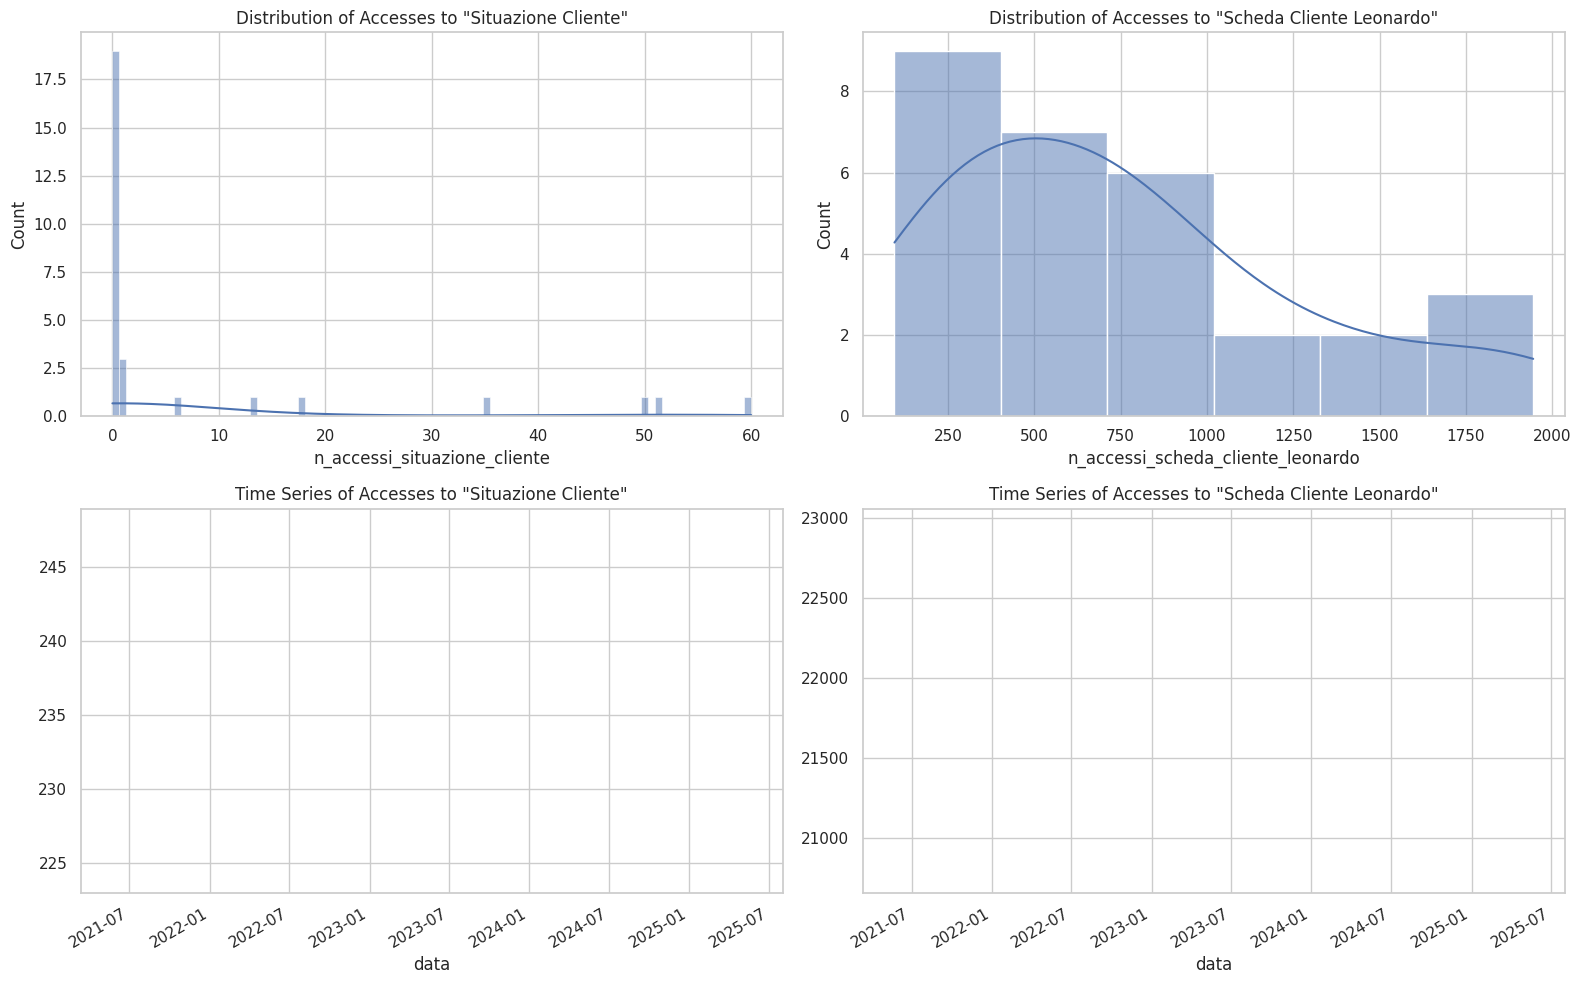

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Plot the distribution of 'n_accessi_situazione_cliente'
sns.histplot(data=data, x='n_accessi_situazione_cliente', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Accesses to "Situazione Cliente"')

# Plot the distribution of 'n_accessi_scheda_cliente_leonardo'
sns.histplot(data=data, x='n_accessi_scheda_cliente_leonardo', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Accesses to "Scheda Cliente Leonardo"')

# Plot the time series of 'n_accessi_situazione_cliente'
data.groupby('data')['n_accessi_situazione_cliente'].sum().plot(ax=axes[1, 0])
axes[1, 0].set_title('Time Series of Accesses to "Situazione Cliente"')

# Plot the time series of 'n_accessi_scheda_cliente_leonardo'
data.groupby('data')['n_accessi_scheda_cliente_leonardo'].sum().plot(ax=axes[1, 1])
axes[1, 1].set_title('Time Series of Accesses to "Scheda Cliente Leonardo"')

# Improve the layout
plt.tight_layout()
plt.show()

# K-means Clustering

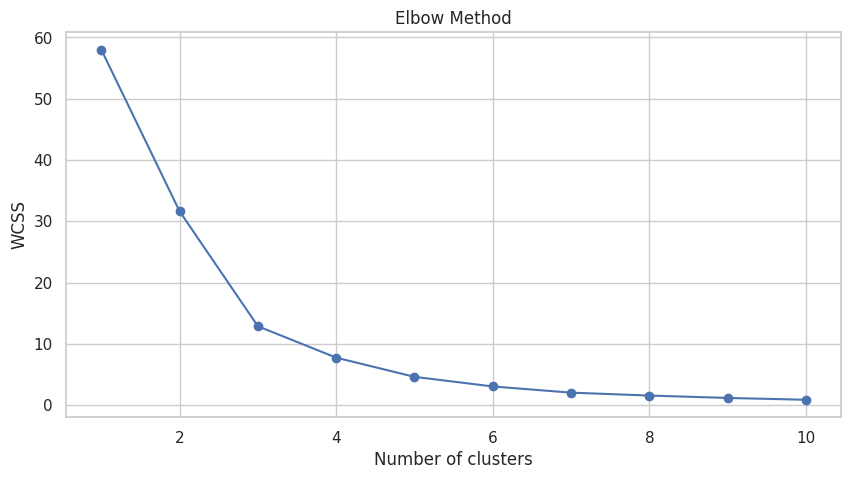

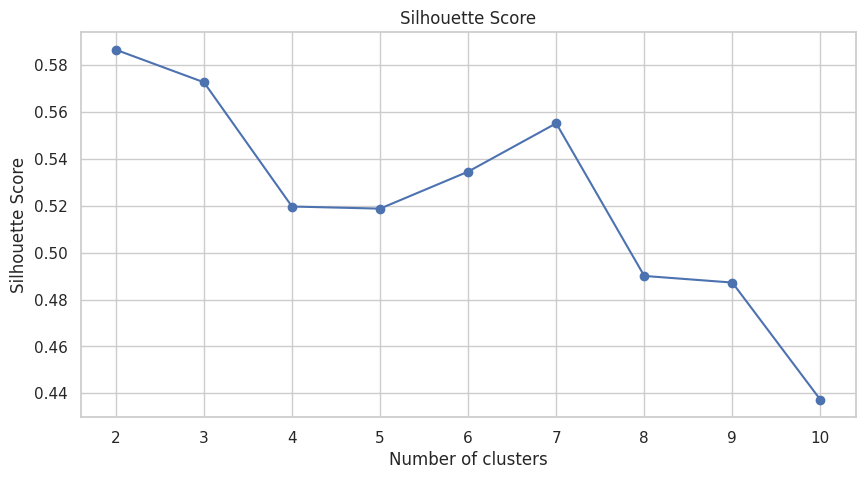

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select the necessary columns
cluster_data = data[['n_accessi_situazione_cliente', 'n_accessi_scheda_cliente_leonardo']]

# Normalize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Calculate WCSS (Within Cluster Sum of Squares) for different number of clusters
wcss = []
silhouette = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_data_scaled)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    if i > 1:  # silhouette score is only defined for 2 or more clusters
        silhouette.append(silhouette_score(cluster_data_scaled, labels))

# Plot the WCSS to find the elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette score
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [8]:
# Apply k-means using 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Display the table of agencies and their associated cluster
data_clustered = data[['cod_age', 'cluster']]
data_clustered


,cod_age,cluster
0,36682,1
1,39228,0
2,39245,1
3,39376,1
4,39425,2
5,39611,1
6,39613,1
7,47420,1
8,52351,1
9,54776,1


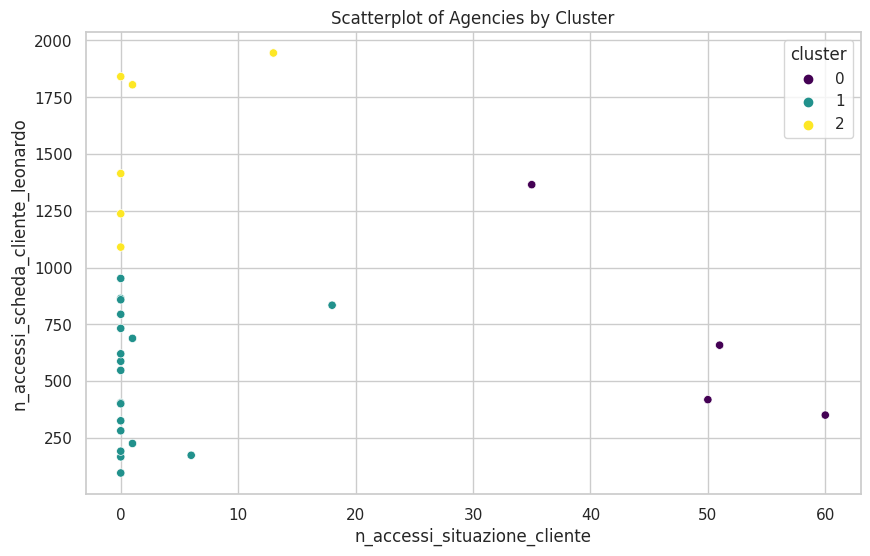

In [9]:
# Scatterplot of the clusters
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='n_accessi_situazione_cliente', y='n_accessi_scheda_cliente_leonardo', hue='cluster', palette='viridis')
scatter.set_title('Scatterplot of Agencies by Cluster')
plt.show()